In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha = 3.28E-5
g = 10.0
Cp = 1000.0

# Linear Temperature
def linear(z,t,z0,z1,t0,t1):
    a = (t1-t0) / (z1-z0)
    b = t0 - a * z[0]
    t = b + a * z
    return t
    
def adiabatic(z,t,t0):
    t = t0 * np.exp((z)*alpha*g/Cp) - 273.15
    return t

In [21]:
contThick = 150.0E3 # m
oceaThick = 80.0E3 # m
maxTemp = 1750.0 # oC
labTemp = 1300.0
minTemp = 0.0 # oC
potTemp = 1233.747226898775# 1410.5196095923106 # oC

n = 101
z = np.linspace(0,1000.0E3,n)

fac = 250.
t_aux  = np.linspace(minTemp,maxTemp+fac,n)
t_1300 = np.ones(t_aux.size) * labTemp
z_cont = np.ones(t_aux.size) * contThick
z_ocea = np.ones(t_aux.size) * oceaThick


t_cont_linear = np.zeros(n)
t_ocea_linear = np.zeros(n)
t_cont_linear = linear(z,t_cont_linear,0,contThick,minTemp,labTemp)
t_ocea_linear = linear(z,t_ocea_linear,0,oceaThick,minTemp,labTemp)

t_cont_adbtic = np.zeros(n)
t_cont_adbtic = adiabatic(z,t_cont_adbtic,potTemp+273.15)
t_ocea_adbtic = np.zeros(n)
t_ocea_adbtic = adiabatic(z,t_ocea_adbtic,potTemp+273.15)


t_cont_final = np.zeros(n)
t_ocea_final = np.zeros(n)
for i in xrange(n):
    t_cont_final[i] = np.min([t_cont_linear[i],t_cont_adbtic[i]])
    t_ocea_final[i] = np.min([t_ocea_linear[i],t_ocea_adbtic[i]])

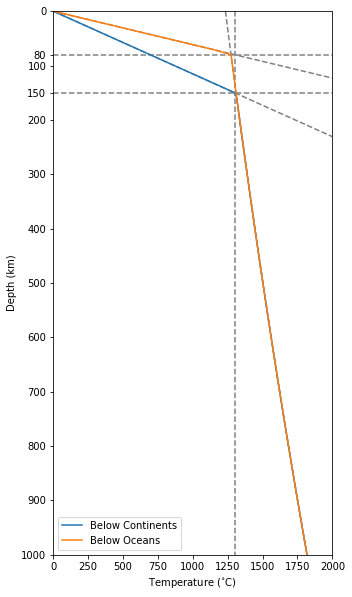

In [22]:
fig = plt.figure(figsize=(5,10))
plt.ylim(z[-1]/1.0E3,0)
plt.xlim(0,1700.0+fac)

plt.plot(t_aux,z_cont/1.0E3,'--',color=(0.5,0.5,0.5))
plt.plot(t_aux,z_ocea/1.0E3,'--',color=(0.5,0.5,0.5))

plt.plot(t_cont_linear,z/1.0E3,'--',color=(0.5,0.5,0.5))
plt.plot(t_ocea_linear,z/1.0E3,'--',color=(0.5,0.5,0.5))

plt.plot(t_cont_adbtic,z/1.0E3,'--',color=(0.5,0.5,0.5))

plt.plot(t_1300,z/1.0E3,'--',color=(0.5,0.5,0.5))

plt.plot(t_cont_final,z/1.0E3,label="Below Continents")
plt.plot(t_ocea_final,z/1.0E3,label="Below Oceans")

plt.ylabel("Depth (km)")
plt.xlabel("Temperature ($\!^\circ\!$C)")

plt.xticks(np.linspace(0,1750,8))
plt.xticks([0,250,500,750,1000,1250,1500,1750,2000])
plt.yticks([0,80,100,150,200,300,400,500,600,700,800,900,1000])
plt.legend(loc=3)

plt.savefig("Temperature_profile.pdf")

plt.show()

In [14]:
z1 = np.linspace(0,contThick,n)
z2 = np.linspace(0,oceaThick,n)
t1 = np.zeros(n)
t2 = np.zeros(n)

t1 = linear(z1,t1,0,contThick,0,labTemp)
t2 = linear(z2,t2,0,oceaThick,0,labTemp)


In [20]:
print(np.max(t_cont_final))
print(t_cont_final[(z>650000)&(z<=660000)])


1818.708112754376
[1596.20897375]


In [17]:
z

array([      0.        ,   14285.71428571,   28571.42857143,
         42857.14285714,   57142.85714286,   71428.57142857,
         85714.28571429,  100000.        ,  114285.71428571,
        128571.42857143,  142857.14285714,  157142.85714286,
        171428.57142857,  185714.28571429,  200000.        ,
        214285.71428571,  228571.42857143,  242857.14285714,
        257142.85714286,  271428.57142857,  285714.28571429,
        300000.        ,  314285.71428571,  328571.42857143,
        342857.14285714,  357142.85714286,  371428.57142857,
        385714.28571429,  400000.        ,  414285.71428571,
        428571.42857143,  442857.14285714,  457142.85714286,
        471428.57142857,  485714.28571429,  500000.        ,
        514285.71428571,  528571.42857143,  542857.14285714,
        557142.85714286,  571428.57142857,  585714.28571429,
        600000.        ,  614285.71428571,  628571.42857143,
        642857.14285714,  657142.85714286,  671428.57142857,
        685714.28571429,

In [6]:
plt.figure(figsize=(10,5))
plt.plot(t_aux,z_ocea/1.0E3,'--',color=(0.5,0.5,0.5))
plt.plot(t1,z1/1.0E3,label="Continental Lithosphere")
plt.plot(t2,z2/1.0E3,label="Oceanic Lithosphere")
plt.ylim([contThick/1.0E3,0])
plt.xlabel("Temperature ($\!^\circ\!$C)")
plt.ylabel("Depth (km)")
plt.xlim(0,labTemp)
plt.legend(loc=3)
plt.xticks(np.linspace(0,labTemp,14))
plt.yticks(np.linspace(0,contThick/1.0E3,16))
plt.savefig("lithosphereProfiel.pdf")
plt.show()

In [66]:
skiprows = 4
Nx, Ny, Nz = 351, 1, 101
path2Temp = '../out/Temper_0_3D.txt'
temp = np.loadtxt(path2Temp,skiprows=skiprows)
temp = np.reshape(temp,(Nx,Ny,Nz),order='F')

xxO = temp[10,0,:]
zzO = np.linspace(1000,0,Nz)
xxC = temp[-10,0,:]
zzC = zzO
# extent = np.array([0,1700+fac,-1000,0])
# plt.ylim(-700,0)
# plt.xlim(0,1700)
# plt.plot(xx,zz)

path2Temp2 = '../out/Temper_0_3D_nodiffusion.txt'
temp2 = np.loadtxt(path2Temp2,skiprows=skiprows)
temp2 = np.reshape(temp2,(Nx,Ny,Nz),order='F')

xxC2 = temp2[10,0,:]
zzC2 = np.linspace(1000,0,Nz)
xxO2 = temp2[-10,0,:]
zzO2 = zzC2


In [67]:
np.shape(temp[0,0,:])

(101,)

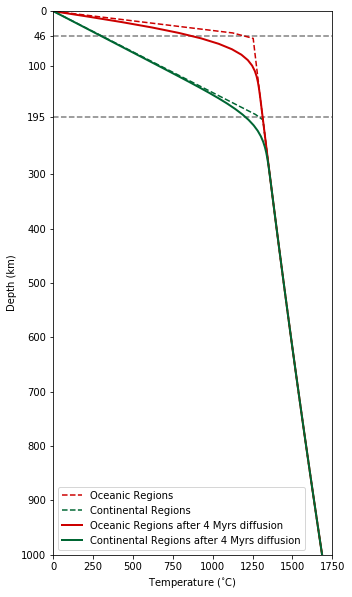

In [72]:
fig = plt.figure(figsize=(5,10))
plt.ylim(z[-1]/1.0E3,0)
plt.xlim(0,1750.0)

# plt.plot(t_aux,z_cont/1.0E3,'--',color=(0.5,0.5,0.5))
# plt.plot(t_aux,z_ocea/1.0E3,'--',color=(0.5,0.5,0.5))

# plt.plot(t_cont_linear,z/1.0E3,'--',color=(0.5,0.5,0.5))
# plt.plot(t_ocea_linear,z/1.0E3,'--',color=(0.5,0.5,0.5))

# plt.plot(t_cont_adbtic,z/1.0E3,'--',color=(0.5,0.5,0.5))

# plt.plot(t_1300,z/1.0E3,'--',color=(0.5,0.5,0.5))

# plt.plot(t_cont_final,z/1.0E3,'--',label="Continents Region")
# plt.plot(t_ocea_final,z/1.0E3,'--',label="Oceans Region")

plt.hlines(46.21855563,0,1750,linestyles='dashed',color=(0.5,0.5,0.5))
plt.hlines(194.76608506,0,1750,linestyles='dashed',color=(0.5,0.5,0.5))

plt.plot(xxC2,zzO2,'--',label="Oceanic Regions",color=(204./255,0,0))
plt.plot(xxO2,zzC2,'--',label="Continental Regions",color=(0./255,102./255,51./255))


plt.plot(xxO,zzO,linewidth=2,label="Oceanic Regions after 4 Myrs diffusion",color=(204./255,0,0))
plt.plot(xxC,zzC,linewidth=2,label="Continental Regions after 4 Myrs diffusion",color=(0./255,102./255,51./255))



plt.ylabel("Depth (km)")
plt.xlabel("Temperature ($\!^\circ\!$C)")

# plt.xticks(np.linspace(0,1750,8))
plt.xticks([0,250,500,750,1000,1250,1500,1750])
plt.yticks([0,46.21855563,100,194.76608506,300,400,500,600,700,800,900,1000])
plt.legend(loc=3)



plt.savefig("Temperature_profile_comp.pdf")

plt.show()

In [34]:
temp.max()

1685.8864009265417